# Analysing star ratings of BT reviews

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [46]:
bt_data = pd.read_csv('data/bt_data.csv',parse_dates=True, index_col=0, engine='python')
bt_data

,content,location,date,satisfaction,customer_service,speed,reliability
0,Awful service awful internet speed and reliab...,Manchester,2017-07-06,1.0,1.0,1.0,1.0
1,Poor customer service. Had to speak to 7 peopl...,Norbury,2017-07-06,2.0,2.0,3.0,3.0
2,Dreadful in every aspect. It simply does not w...,Tenbury Wells,2017-07-05,1.0,1.0,1.0,1.0
3,SHOCKING service. Placed order got told it wi...,Morpeth,2017-07-04,1.0,1.0,1.0,1.0
4,Very unhappy with connection quality and custo...,Norfolk,2017-07-04,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
3187,Just a warning about BT Infinity the BT Hub b...,Wales,2017-08-26,1.0,1.0,3.0,1.0
3188,I have had a contract with BT for telephone b...,Wimbledon,2017-08-26,1.0,1.0,1.0,1.0
3189,Little satisfaction from BT sales/help; poor s...,Norton Bavant,2017-08-26,1.0,1.0,1.0,2.0
3190,Just don't do it. New build took 11 weeks for...,Milton Keynes,2017-08-25,1.0,1.0,5.0,3.0


### Checking datatype of all columns in our data frame. 

In [47]:
bt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3192 entries, 0 to 3191
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   content           3189 non-null   object 
 1   location          3134 non-null   object 
 2   date              3192 non-null   object 
 3   satisfaction      2832 non-null   float64
 4   customer_service  2796 non-null   float64
 5   speed             2773 non-null   float64
 6   reliability       2761 non-null   float64
dtypes: float64(4), object(3)
memory usage: 199.5+ KB


<div class="alert alert-block alert-warning">
We observe that star rating columns are float. This has to be converted to integer datatype.
</div>

### Converting dtype of star ratings from object to int

In [48]:
# Function to convert dtype to integer

def convert_to_int(df, columns):
    for column in columns:
        df[column] = df[column].astype('Int64')  
    
convert_to_int(df=bt_data, columns=['satisfaction','customer_service','speed','reliability'])
bt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3192 entries, 0 to 3191
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   content           3189 non-null   object
 1   location          3134 non-null   object
 2   date              3192 non-null   object
 3   satisfaction      2832 non-null   Int64 
 4   customer_service  2796 non-null   Int64 
 5   speed             2773 non-null   Int64 
 6   reliability       2761 non-null   Int64 
dtypes: Int64(4), object(3)
memory usage: 212.0+ KB


In [49]:
bt_data.head()

,content,location,date,satisfaction,customer_service,speed,reliability
0,Awful service awful internet speed and reliab...,Manchester,2017-07-06,1,1,1,1
1,Poor customer service. Had to speak to 7 peopl...,Norbury,2017-07-06,2,2,3,3
2,Dreadful in every aspect. It simply does not w...,Tenbury Wells,2017-07-05,1,1,1,1
3,SHOCKING service. Placed order got told it wi...,Morpeth,2017-07-04,1,1,1,1
4,Very unhappy with connection quality and custo...,Norfolk,2017-07-04,1,1,1,1


## Analysing count of star ratings

In [50]:
# function to return the value count of a column
def count_value(col):
    return col.value_counts().sort_index()

In [51]:
# function to plot grouped bar chart
def grouped_bar_chart(y1,y2,y3,y4):
    plt.figure(figsize = (20,10))
    ax = plt.subplot()

    labels = [1,2,3,4,5]
    x = np.arange(len(labels))
    y1 = y1
    y2 = y2
    y3 = y3
    y4 = y4
    width=0.2

    # plt.xlabel('star rating', fontsize=25)
    plt.ylabel('Count', fontsize=25)
    plt.title('Star Ratings', fontsize=30)
    plt.yticks(fontsize=20)

    ax.set_xticks(x, labels, size=20)

    r1=ax.bar(x-0.3, y1, width, label='satisfaction')
    r2=ax.bar(x-0.1, y2, width, label='customer_service')
    r3=ax.bar(x+0.1, y3, width, label='speed')
    r4=ax.bar(x+0.3, y4, width, label='reliability')

    ax.grid(linestyle='--')
    ax.legend(loc='upper right', prop={'size': 20})
    
    ax.bar_label(r1, padding=3)
    ax.bar_label(r2, padding=3)
    ax.bar_label(r3, padding=3)
    ax.bar_label(r4, padding=3)

    plt.show()

### Checking for null values

In [52]:
bt_data.isnull().sum()

content               3
location             58
date                  0
satisfaction        360
customer_service    396
speed               419
reliability         431
dtype: int64

### Case1: Ignoring null values

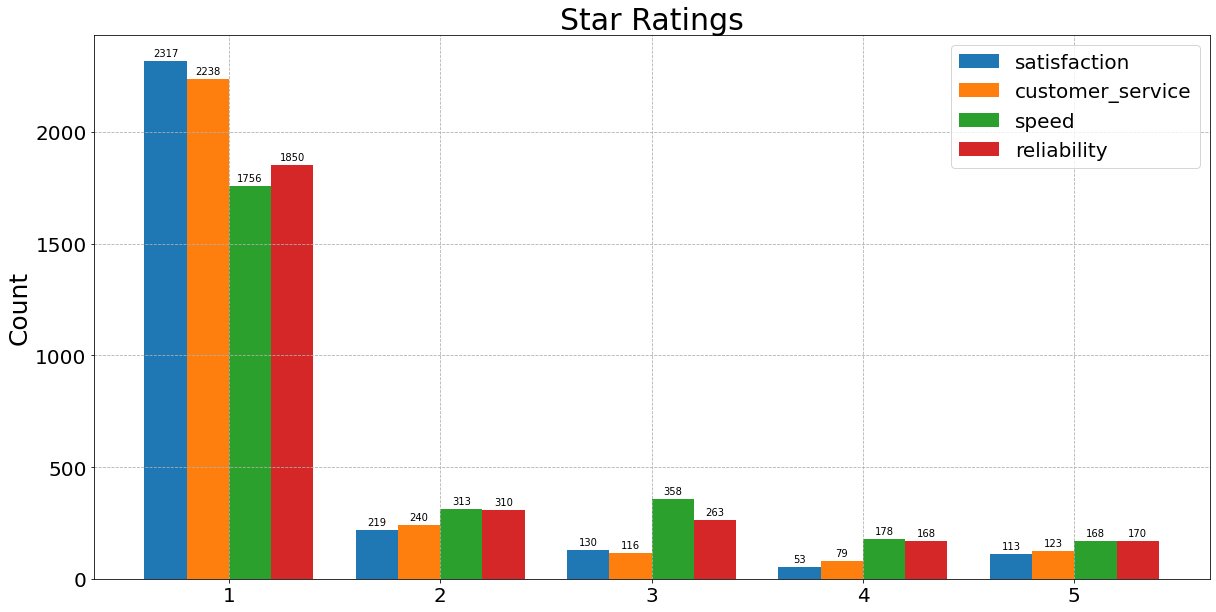

In [53]:
bt_data_ignoring_null = bt_data

satisfaction_count = count_value(bt_data_ignoring_null['satisfaction'])
cs_count = count_value(bt_data_ignoring_null['customer_service'])
speed_count = count_value(bt_data_ignoring_null['speed'])
reliability_count = count_value(bt_data_ignoring_null['reliability'])

grouped_bar_chart(satisfaction_count,cs_count,speed_count, reliability_count)

### Case2: Replacing null values

<div class="alert alert-block alert-info">
null values observed in the columns are replaced with mean of the column.
</div>

In [54]:
# function to replace with mean
def replace_null_mean(df, columns):
    for column in columns:
        value=df[column].mean()
        df[column] = df[column].fillna(round(value))

bt_data_replacing_null_mean = bt_data
replace_null_mean(df=bt_data_replacing_null_mean, 
                  columns=['satisfaction','customer_service','speed','reliability'])

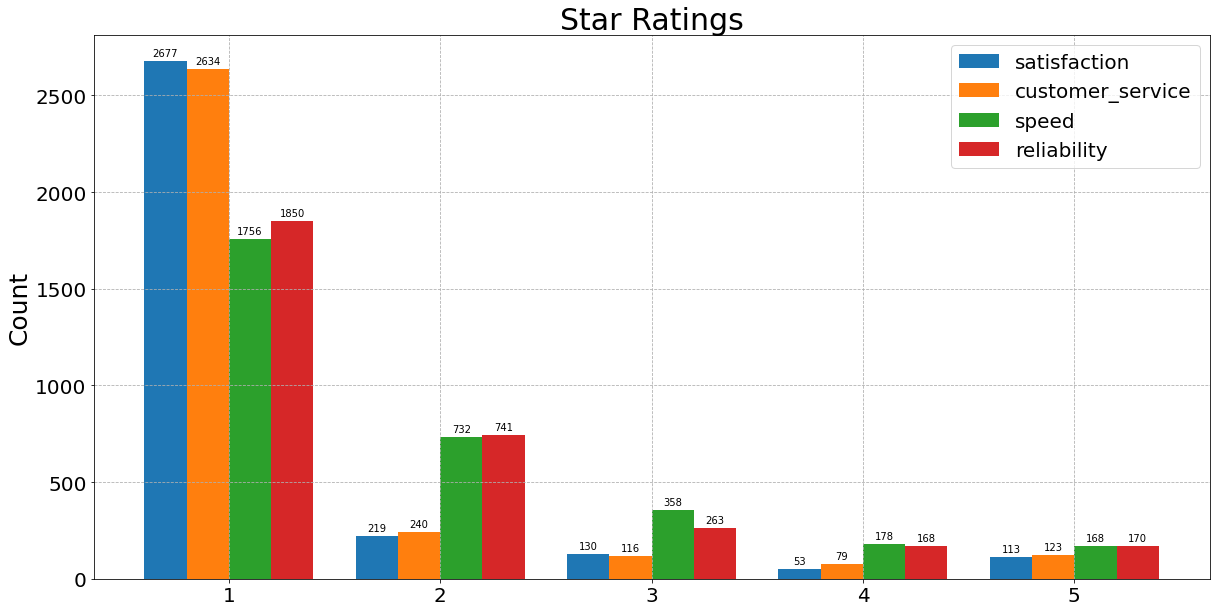

In [55]:
# to plot grouped bar chart
satisfaction_count = count_value(bt_data_replacing_null_mean['satisfaction'])
cs_count = count_value(bt_data_replacing_null_mean['customer_service'])
speed_count = count_value(bt_data_replacing_null_mean['speed'])
reliability_count = count_value(bt_data_replacing_null_mean['reliability'])

grouped_bar_chart(satisfaction_count,cs_count,speed_count, reliability_count)

<div class="alert alert-block alert-info">
Comparing the above 2 graphs we observe that:
    
* Satisfaction and Customer Service rating has been very poor (Rating of 1 star).
    
* Speed and reliability is poor but has scored better than the other two parameters which has scope for improvement (mean rating of 2 star). 
</div>

### Histogram plot of ratings

In [121]:
hist_df=bt_data[['date', 'satisfaction', 'customer_service', 'speed', 'reliability']]
# hist_df.set_index('date')
hist_df.head(2)

,date,satisfaction,customer_service,speed,reliability
0,2017-07-06,1,1,1,1
1,2017-07-06,2,2,3,3


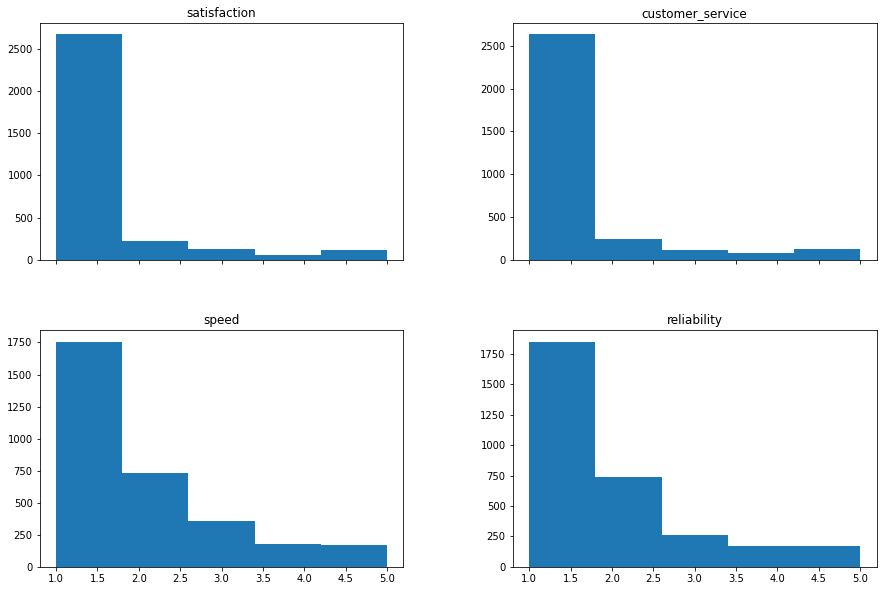

In [76]:
hist_df.hist(bins=5, grid=False, sharex=True, figsize=(15,10))
plt.show()